In [59]:
import sounddevice as sd
import datetime
from time import sleep
import matplotlib.pyplot as plt
import numpy as np

In [60]:
fs = 48000 #sampling frequency, two times the max audible freq aprox, because of Nyquist
duration = 2  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.wait()

In [61]:
len(myrecording)

96000

In [62]:
np.size(myrecording)

192000

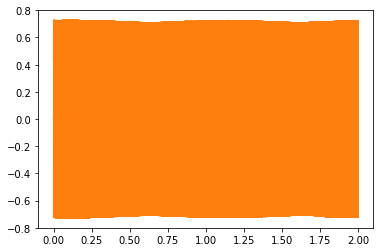

In [63]:
t = np.linspace(0.0,2.0,96000)
plt.plot(t,myrecording)

In [41]:
myarray = []
myrecording = sd.playrec(myarray, fs, channels=2)    

(96000, 2)


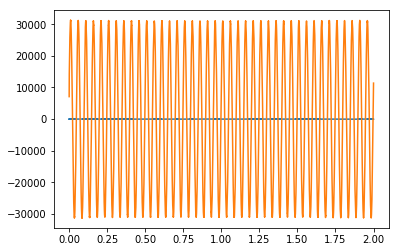

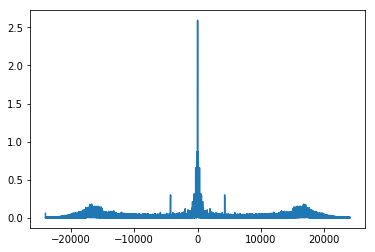

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
#Data on recording, etc on: https://python-sounddevice.readthedocs.io/en/0.3.12/usage.html#recording
fs = 48000
T = 1/fs
duration = 2  # seconds
N = int(duration*fs)
x = sd.rec(N, samplerate=fs, channels=2)
print(str(x.shape))
sd.wait()
#sd.play(x,samplerate=fs)
t = np.arange(0,duration,1/fs) # time vector
plt.plot(t,x)
plt.show()
X0 = np.fft.fftshift(np.fft.fft(x[:,0])/N)
X1 = np.fft.fftshift(np.fft.fft(x[:,1])/N)
f = np.arange(-1/(2*T),1/(2*T),1/(N*T))
plt.plot(f,np.abs(X0))
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


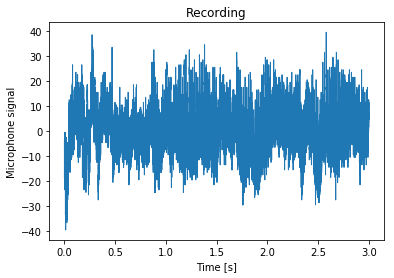

In [74]:
import sounddevice as sd
import numpy as np
from matplotlib import pyplot as plt

T  = 3.0            # Duration of recording
Fs = 11025          # Sampling rate
N = Fs*T            # For plotting 
t = np.linspace(0, T*(N-1)/N, N) 

# Recording
my_recording = sd.rec(int(T*Fs), samplerate = Fs, channels = 1)
sd.wait()                   # Waits until recording is done
sd.play(my_recording, Fs)   # Plays back recording

# Removing mean sound level
s = np.mean(my_recording)
y = my_recording - s

# Plotting
plt.plot(t, y, linewidth = 1)
plt.title("Recording")
plt.xlabel("Time [s]")
plt.ylabel("Microphone signal")
plt.show()